# Sentence complexity analysis
We calculate the sentence complexity of the essays in two different ways.

We count the number of these dependency labels in the essays:
1. 	Clausal modifier of noun
2.	Conjunct
3.  Adverbial clause modifier
4.  Clausal complement
5.  Clausal subject
6.  Discourse
7.  Parataxis
and compare ChatGPT with the student essays (see Fig.: Complexity score of essays).

Then we compute the depth of the dependency tree (see Fig.: Complexity depth of essays). Then we calculate the depth of the dependency tree for each essay (see Fig.: Complexity score with depth of essays). We then compare the two results, showing that the student essays are generally less complex than the generated essays.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import config
import spacy
from scipy.interpolate import make_interp_spline

nlp = spacy.load("en_core_web_sm")
plt.rcParams["figure.figsize"] = (config.fig_x, config.fig_y)
path = config.system_path
essays = pd.read_csv(path + "preprocessed_data.csv", sep=";", encoding="UTF-8")

def plot_smooth(x, y, label, color):
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = label, color = color)

# Calcualtes the number of specified dependency label within a sentence
def calculate_dep_score(text):
    temp = []
    for sentence in nlp(text).sents:
        temp.append(sent_complexity_structure(sentence))
    return np.mean(temp)

# Calculates the dependency depth 
def calculate_dep_length(text):
    temp = []
    for sentence in nlp(text).sents:
        temp.append(walk_tree(sentence.root, 0))
    return np.mean(temp)  

# Return the number of specified dependency labels found
def sent_complexity_structure(doc):
    return len([token for token in doc if (token.dep_ == "acl" or token.dep_ == "conj" or token.dep_ == "advcl"or token.dep_ == "ccomp"
    or token.dep_ == "csubj" or token.dep_ == "discourse" or token.dep_ == "parataxis")])

# Walks the dependency tree and returns the depth
def walk_tree(node, depth):
    if node.n_lefts + node.n_rights > 0:
        return max(walk_tree(child, depth + 1) for child in node.children)
    else:
        return depth


essays["Student complexity_1"] = essays["Student Essay"].apply(lambda x: calculate_dep_score(x))
essays["ChatGPT 0.2 complexity_1"] = essays["ChatGPT Essay 0.2"].apply(lambda x: calculate_dep_score(x))
essays["ChatGPT 0.9 complexity_1"] = essays["ChatGPT Essay 0.9"].apply(lambda x: calculate_dep_score(x))

essays["Student complexity_2"] = essays["Student Essay"].apply(lambda x: calculate_dep_length(x))
essays["ChatGPT 0.2 complexity_2"] = essays["ChatGPT Essay 0.2"].apply(lambda x: calculate_dep_length(x))
essays["ChatGPT 0.9 complexity_2"] = essays["ChatGPT Essay 0.9"].apply(lambda x: calculate_dep_length(x))



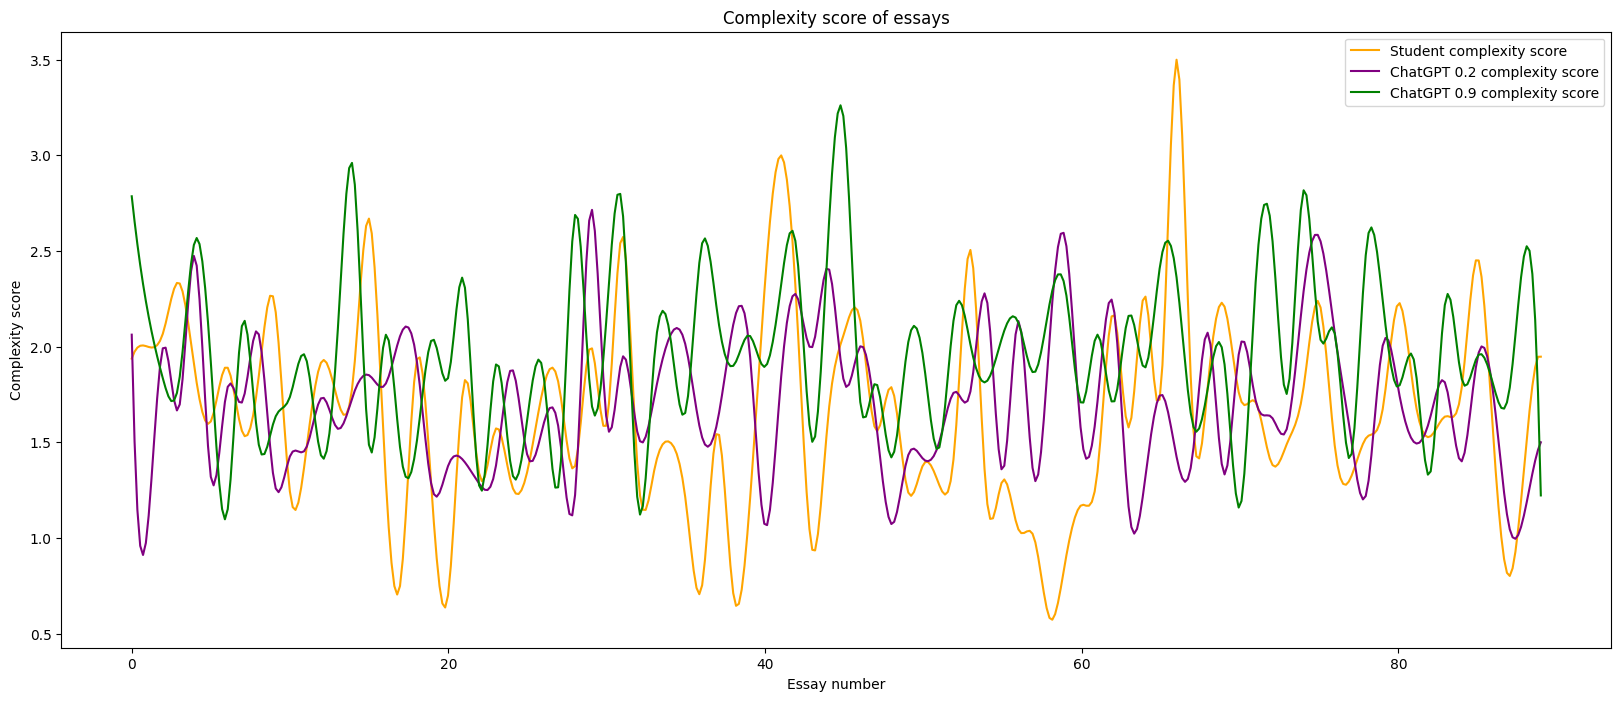

In [2]:
plot_smooth(essays["Unnamed: 0"], essays["Student complexity_1"], "Student complexity score", "orange")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT 0.2 complexity_1"], "ChatGPT 0.2 complexity score", "purple")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT 0.9 complexity_1"], "ChatGPT 0.9 complexity score", "green")
plt.xlabel("Essay number")
plt.ylabel("Complexity score")
plt.title("Complexity score of essays")
plt.legend()
plt.show()

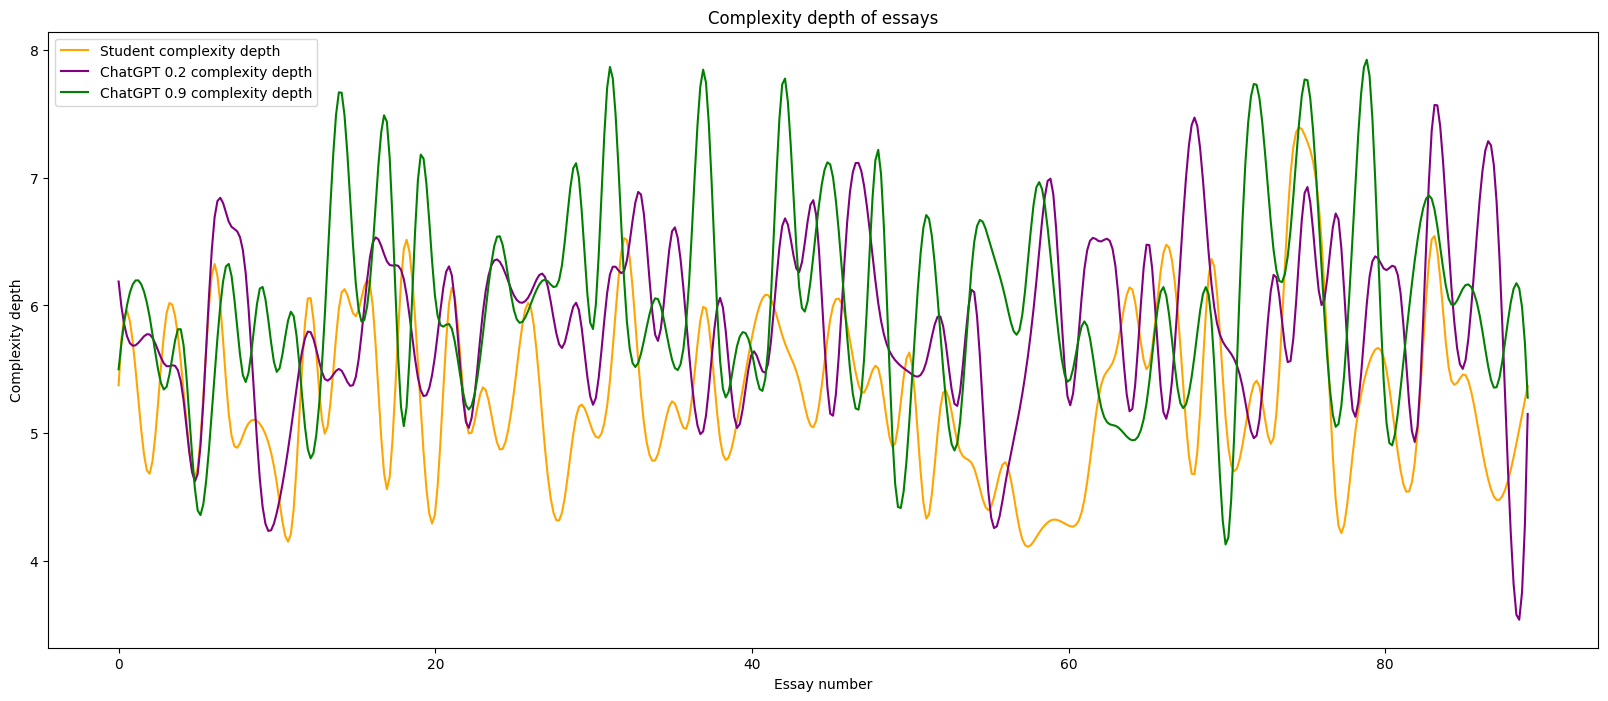

In [3]:
plot_smooth(essays["Unnamed: 0"], essays["Student complexity_2"], "Student complexity depth", "orange")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT 0.2 complexity_2"], "ChatGPT 0.2 complexity depth", "purple")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT 0.9 complexity_2"], "ChatGPT 0.9 complexity depth", "green")
plt.xlabel("Essay number")
plt.ylabel("Complexity depth")
plt.title("Complexity depth of essays")
plt.legend()
plt.show()

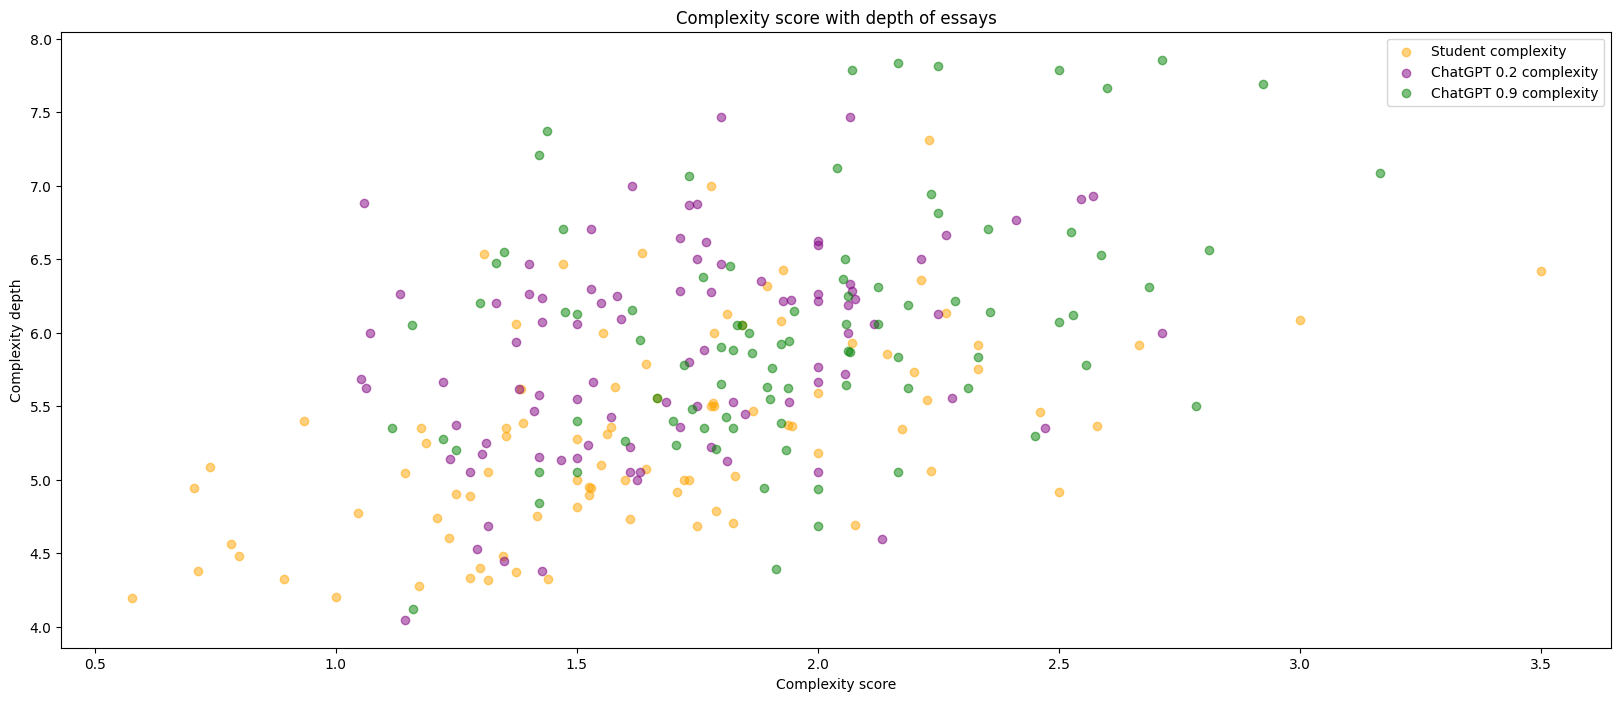

In [4]:
plt.scatter(essays["Student complexity_1"], essays["Student complexity_2"], color = "orange", alpha=0.5, label = "Student complexity")
plt.scatter(essays["ChatGPT 0.2 complexity_1"], essays["ChatGPT 0.2 complexity_2"], color = "purple", alpha=0.5, label = "ChatGPT 0.2 complexity")
plt.scatter(essays["ChatGPT 0.9 complexity_1"], essays["ChatGPT 0.9 complexity_2"], color = "green", alpha=0.5, label = "ChatGPT 0.9 complexity")
plt.xlabel("Complexity score")
plt.ylabel("Complexity depth")
plt.title("Complexity score with depth of essays")
plt.legend()
plt.show()